<h1>
    <font color=0000FF>
        6.5 Unsupervised Machine Learning: Clustering 
    </font>
</h1>

___

## This script contains the following:

### 1. Importing libraries and data 

### 2. Data cleaning 

### 3. The elbow technique

### 4. The k-means clustering

___

### 1. Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl

In [2]:
# To display graphs in the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#Turn project folder path into a string

'/Users/aysha/Documents/Achievement 6 - Global Suicide Rates/'

'/Users/aysha/Documents/Achievement 6 - Global Suicide Rates/'

In [4]:
# Define path

path = r'/Users/aysha/Documents/Achievement 6 - Global Suicide Rates/'

In [5]:
path

'/Users/aysha/Documents/Achievement 6 - Global Suicide Rates/'

In [6]:
# Import the global suicides data

df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'master.csv'), index_col = False)

In [7]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


___


### 2. Data Cleaning

In [8]:
# Renaming column suicides_no to count of suicides
# Renaming column suicides/100k pop to suicide rate
df.rename(columns = {'suicides_no' : 'count of suicides'}, inplace = True)
df.rename(columns = {'suicides/100k pop' : 'suicide rate'}, inplace = True)

In [9]:
#Dropping column'country-year' as it's a composite key of country and year variable from df

df = df.drop(columns = ['country-year'])

In [10]:
df.columns

Index(['country', 'year', 'sex', 'age', 'count of suicides', 'population',
       'suicide rate', 'HDI for year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [11]:
df.describe()

,year,count of suicides,population,suicide rate,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [12]:
# Check for missing values

df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
count of suicides         0
population                0
suicide rate              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [13]:
# Fill missing values for HDI for year with mean 

df.fillna({"HDI for year":df['HDI for year'].mean()},inplace=True)

In [14]:
df

,country,year,sex,age,count of suicides,population,suicide rate,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,0.776601,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,0.776601,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,0.776601,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,0.776601,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,0.776601,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,0.675000,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,0.675000,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,0.675000,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,0.675000,"63,067,077,179",2309,Generation Z


In [15]:
# As we can see, there is plenty of categorical data, so we need to keep only the numerical one

df1 = df.drop(columns =['country','sex','age','generation'])

In [16]:
df1.head()

,year,count of suicides,population,suicide rate,HDI for year,gdp_for_year ($),gdp_per_capita ($)
0,1987,21,312900,6.71,0.776601,"2,156,624,900",796
1,1987,16,308000,5.19,0.776601,"2,156,624,900",796
2,1987,14,289700,4.83,0.776601,"2,156,624,900",796
3,1987,1,21800,4.59,0.776601,"2,156,624,900",796
4,1987,9,274300,3.28,0.776601,"2,156,624,900",796


In [17]:
# Convert data type from string to float for column gdp_for_year ($)

df1[" gdp_for_year ($) "] = [float(str(i).replace(",", "")) for i in df[" gdp_for_year ($) "]]

___

#### Standardizing data

In [19]:
# Define standard scaler
scaler = StandardScaler()

# Transform data
standardized_data = scaler.fit_transform(df1)
print(standardized_data)

[[-1.68361541e+00 -2.45639267e-01 -3.91617465e-01 ... -2.81941527e-14
  -3.05055908e-01 -8.50863703e-01]
 [-1.68361541e+00 -2.51182310e-01 -3.92870115e-01 ... -2.81941527e-14
  -3.05055908e-01 -8.50863703e-01]
 [-1.68361541e+00 -2.53399527e-01 -3.97548377e-01 ... -2.81941527e-14
  -3.05055908e-01 -8.50863703e-01]
 ...
 [ 1.50451895e+00 -2.02403536e-01  2.34517535e-01 ... -1.98474209e+00
  -2.63152270e-01 -7.70756697e-01]
 [ 1.50451895e+00 -2.20141272e-01  2.01141331e-01 ... -1.98474209e+00
  -2.63152270e-01 -7.70756697e-01]
 [ 1.50451895e+00 -2.45639267e-01 -1.03754805e-01 ... -1.98474209e+00
  -2.63152270e-01 -7.70756697e-01]]


In [20]:
# Converting to dataframe
df1 = pd.DataFrame(standardized_data, columns=df1.columns)
print(df1)

           year  count of suicides  population  suicide rate  HDI for year  \
0     -1.683615          -0.245639   -0.391617     -0.322032 -2.819415e-14   
1     -1.683615          -0.251182   -0.392870     -0.402196 -2.819415e-14   
2     -1.683615          -0.253400   -0.397548     -0.421182 -2.819415e-14   
3     -1.683615          -0.267811   -0.466035     -0.433839 -2.819415e-14   
4     -1.683615          -0.258943   -0.401485     -0.502928 -2.819415e-14   
...         ...                ...         ...           ...           ...   
27815  1.504519          -0.150299    0.454032     -0.519804 -1.984742e+00   
27816  1.504519          -0.258943   -0.382526     -0.539845 -1.984742e+00   
27817  1.504519          -0.202404    0.234518     -0.561468 -1.984742e+00   
27818  1.504519          -0.220141    0.201141     -0.587838 -1.984742e+00   
27819  1.504519          -0.245639   -0.103755     -0.598913 -1.984742e+00   

        gdp_for_year ($)   gdp_per_capita ($)  
0              

In [74]:
df1

array([[-1.68361541, -0.24563927, -0.39161747, ..., -0.30505591,
        -0.8508637 , -0.55755865],
       [-1.68361541, -0.25118231, -0.39287011, ..., -0.30505591,
        -0.8508637 , -0.55755865],
       [-1.68361541, -0.25339953, -0.39754838, ..., -0.30505591,
        -0.8508637 , -0.55755865],
       ...,
       [ 1.50451895, -0.20240354,  0.23451753, ..., -0.26315227,
        -0.7707567 , -0.55755865],
       [ 1.50451895, -0.22014127,  0.20114133, ..., -0.26315227,
        -0.7707567 , -0.55755865],
       [ 1.50451895, -0.24563927, -0.1037548 , ..., -0.26315227,
        -0.7707567 , -0.55755865]])

___

### 3. The elbow technique

In [21]:
# Defining the range of the cluster
num_cl = range(1, 10) 

# Then, defining the k-means cluster in the range assigned above .
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [22]:
# Create a score that represents a rate of variation for the given cluster option.

score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] 

score

[-194740.00000000003,
 -153905.81982289124,
 -125984.20808280495,
 -109211.76045628823,
 -94972.15725034762,
 -85414.8666151058,
 -75993.67683215583,
 -66768.67920444376,
 -62048.04996752806]

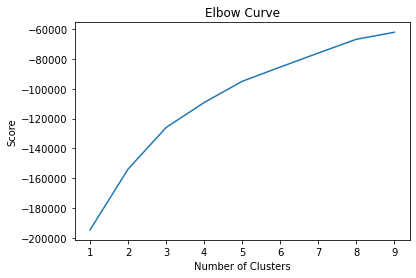

In [23]:
# Plot the elbow graph using PyLab

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

**Number of Clusters**

**Observations**

* From the graph above, there's a jump from two to three on the x-axis, but after that, the curve starts to straighten out. The breaking point of the curve lies between two and three. 
This implies that we'll need to use one of those values. The optimal count for clusters is **three** in this case, as the DF has a lot of information, and the numerical variation for some variables is quite huge.

___

### 4. The k-means clustering

In [24]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [25]:
# Fit the k-means object to the data.

kmeans.fit(df1)

KMeans(n_clusters=3)

___

#### Attaching to the DF

In [26]:
df1['clusters'] = kmeans.fit_predict(df1)

In [27]:
df1.head()

,year,count of suicides,population,suicide rate,HDI for year,gdp_for_year ($),gdp_per_capita ($),clusters
0,-1.683615,-0.245639,-0.391617,-0.322032,-2.819415e-14,-0.305056,-0.850864,1
1,-1.683615,-0.251182,-0.392870,-0.402196,-2.819415e-14,-0.305056,-0.850864,1
2,-1.683615,-0.253400,-0.397548,-0.421182,-2.819415e-14,-0.305056,-0.850864,1
3,-1.683615,-0.267811,-0.466035,-0.433839,-2.819415e-14,-0.305056,-0.850864,1
4,-1.683615,-0.258943,-0.401485,-0.502928,-2.819415e-14,-0.305056,-0.850864,1


In [28]:
# Verify if the clusters we correctly assigned with a general view (df1.clusters.value_counts())

df1['clusters'].value_counts()

1    21180
2     5889
0      751
Name: clusters, dtype: int64

___

#### Plotting

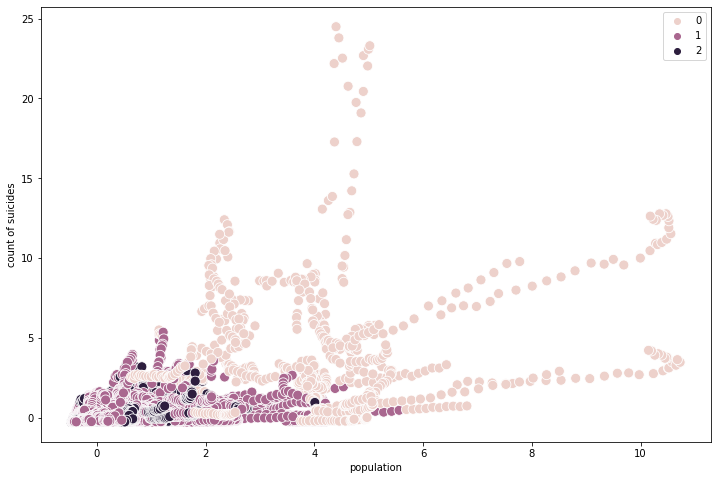

In [33]:
# # Plot the clusters for the "population" and "count of suicides" variables.


plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['population'], y=df1['count of suicides'], hue=kmeans.labels_, s=100)
# Here, we're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('population') # Label x-axis.
plt.ylabel('count of suicides') # Label y-axis.
plt.show()

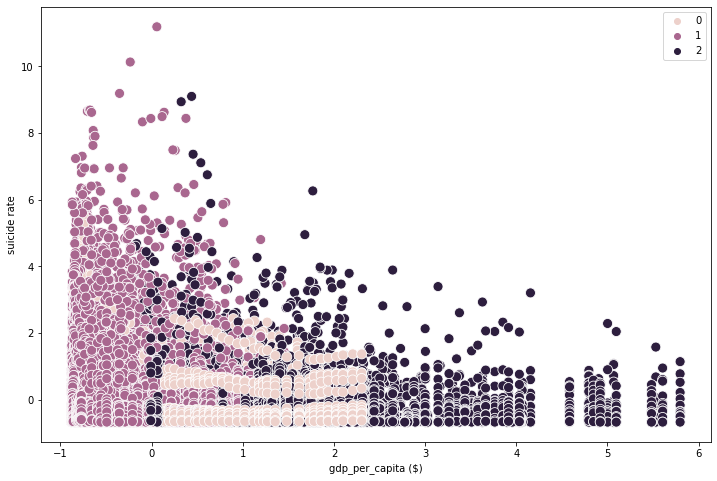

In [34]:
# Plot the clusters for the "gdp_per_capita ($)" and "suicide rate" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['gdp_per_capita ($)'], y=df1['suicide rate'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('gdp_per_capita ($)') 
plt.ylabel('suicide rate') 
plt.show()

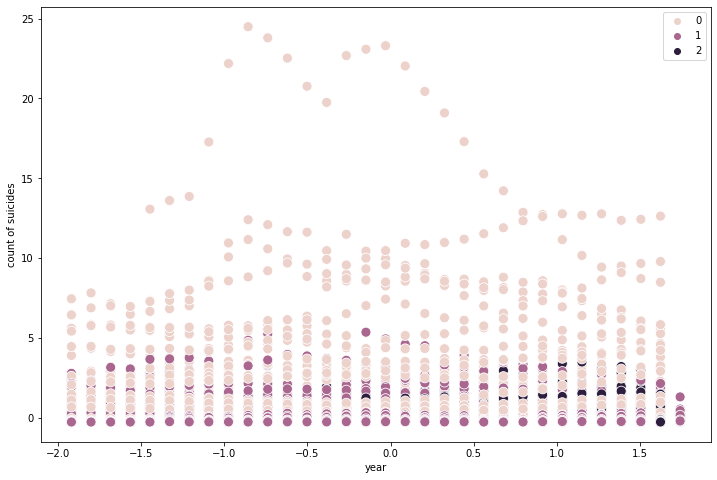

In [35]:
# Plot the clusters for the "year" and "count of suicdes" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['year'], y=df1['count of suicides'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('year') 
plt.ylabel('count of suicides') 
plt.show()

___

#### Plot analysis

It is worth to note that not all clusters made sense. 

* Population & Count of suicides: 
All the clusters are plotted close to each other within the chart. 

* GDP per capita & Suicide rate: 
This makes sense as cluster (1) with the majority of data points is plotted in the level of gdp per capita indicating that count of suicides is higher where gdp per capita ($) is lower. 

* Year & Count of Suicides: 
From the chart, we can see that all cluster are spread overall.

___

#### Grouping

In [32]:
df1.groupby('clusters').agg({'count of suicides':['mean', 'median'], 
                         'gdp_per_capita ($)':['mean', 'median'], 
                         'year':['mean', 'median'],
                            'suicide rate':['mean','median']})

count of suicides           gdp_per_capita ($)                year  \
                      mean    median               mean    median      mean   
clusters                                                                      
0                 4.032112  2.918329           0.747728  0.896083  0.035999   
1                -0.119186 -0.246748          -0.412826 -0.587458 -0.241284   
2                -0.085541 -0.232336           1.389389  1.250079  0.863195   

                   suicide rate            
            median         mean    median  
clusters                                   
0         0.087570     0.643746  0.369909  
1        -0.266667    -0.015822 -0.394812  
2         1.032203    -0.025190 -0.306737

___

#### Grouping Analysis

**Cluster (0) has the highest mean and median in terms of suicide rates. 
It is interesting to see that cluster (1), with the highest data points, and cluster (2) with the least amount of data points have almost similar numbers for mean for suicide rates. However, it is worthy to note that this analysis has given more insight into the need to explore the categorical variables in dataframe in other to discover the actual determinant(s) behind global suicide rates over the years.**

___